In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('top-5000-youtube-channels.csv')

In [3]:
data.head(-5) # إخفاء اخر خمسة أعمدة

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4990,"4,991st",B+,Ho Ngoc Ha's Official Channel,208,--,127185704
4991,"4,992nd",B+,Toys to Learn Colors,11,663114,141933264
4992,"4,993rd",B+,КАZКА,25,131766,74304638
4993,"4,994th",B+,United CUBE (CUBE Entertainment…,1055,1586835,371299166


In [4]:
data.tail(-5) # إخفاء أول خمسة أعمدة 

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307
...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764


In [5]:
data.shape # شكل البيانات 

(5000, 6)

In [6]:
pd.options.display.float_format = '{:.2f}'.format
data.describe()

,Video views
count,5000.00
mean,1071449400.15
std,2003843972.12
min,75.00
25%,186232945.75
50%,482054780.00
75%,1124367826.75
max,47548839843.00


In [7]:
data

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764


In [8]:
data.sample(100)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4676,"4,677th",B+,Игрули TV,207,260644,222613832
2836,"2,837th",B+,SuperbLyrics,509,1084644,387816147
4680,"4,681st",B+,Garnier México,46,33029,161871841
11,12th,A+,Canal KondZilla,822,39409726,19291034467
2565,"2,566th",B+,Vision Time Tamil,6181,846898,482057974
...,...,...,...,...,...,...
4002,"4,003rd",B+,Nestlé Việt Nam,262,190457,176147511
3617,"3,618th",B+,PrankBrosTV,459,1614629,475691884
341,342nd,A,VEGETTA777,4710,23775389,9365416666
4838,"4,839th",B+,Godenot,4333,2462268,692860759


In [9]:
# regex يغير السلسلة المدخلة الى نمط لنسطيع إستخراجها أياً كان موقعها 
# text mining تم دراسة النماط بشكل مفصل في مشروع  
data = data.replace('--',np.nan,regex=True)  # إستبدال السلاسلة بقيم مفقودة 

In [10]:
data.isnull().sum() # القيم الفقودة في كل عامود

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [11]:
per_missing = data.isnull().sum() * 100 /len(data)

In [12]:
per_missing # النسبة المئوية للقيم الفققودة في كل عامود

Rank            0.00
Grade           0.00
Channel name    0.00
Video Uploads   0.12
Subscribers     7.74
Video views     0.00
dtype: float64

<AxesSubplot:>

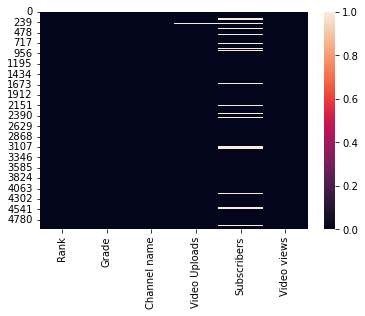

In [13]:
sns.heatmap(data.isnull())

In [14]:
data.dropna(inplace=True) # إسقاط هذه القيم

In [15]:
data.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

In [16]:
data['Rank'].dtype

dtype('O')

In [17]:
data['Rank']=data['Rank'].str[0:-2] # تقطيع العامود حسب الحاجة 
data['Rank']

0           1
1           2
2           3
3           4
4           5
        ...  
4995    4,996
4996    4,997
4997    4,998
4998    4,999
4999    5,000
Name: Rank, Length: 4610, dtype: object

In [18]:
data['Rank']=data['Rank'].str.replace(',','.') # إستبدال الفاصلة غير العشرية بفاصلة عشرية

In [19]:
data['Rank']=data['Rank'].astype('float') # تغير نوع العامود

In [20]:
data.dtypes

Rank             float64
Grade             object
Channel name      object
Video Uploads     object
Subscribers       object
Video views        int64
dtype: object

In [21]:
data['Subscribers'] = data['Subscribers'].astype(int) # تغير نوع العامود

In [22]:
data['Video Uploads']=data['Video Uploads'].astype(int) # تغير نوع العامود

In [23]:
data.dtypes

Rank             float64
Grade             object
Channel name      object
Video Uploads      int32
Subscribers        int32
Video views        int64
dtype: object

In [24]:
data['Grade'].unique() # معرفة قيم العامود المتكررة 

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [25]:
# هنا قد تغير النوع لوحده بإستبدال القيم
data['Grade']=data['Grade'].map({'A++ ':5,'A+ ':4,'A ':3,'A- ':2,'B+ ':1})

In [26]:
data.dtypes 

Rank             float64
Grade              int64
Channel name      object
Video Uploads      int32
Subscribers        int32
Video views        int64
dtype: object

In [27]:
# كتوسط المشاهدات في كل قناة للفيديو الواحد
data['Avr_views']=data['Video views']/data['Video Uploads']

In [28]:
data.head(1)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avr_views
0,1.00,5,Zee TV,82757,18752951,20869786591,252181.53


In [29]:
data.sort_values(by='Video Uploads',ascending= False).head() # ترتيب البيانات

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avr_views
3453,3.45,1,AP Archive,422326,746325,548619569,1299.04
1149,1.15,2,YTN NEWS,355996,820108,1640347646,4607.77
2223,2.22,1,SBS Drama,335521,1418619,1565758044,4666.65
323,324.00,3,GMA News,269065,2599175,2786949164,10357.90
2956,2.96,1,MLB,267649,1434206,1329206392,4966.23


In [30]:
data.sort_values(by='Avr_views',ascending=False).head(10)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avr_views
628,629.00,3,cocoz toon,1,2162992,333012122,333012122.00
314,315.00,3,icanrockyourworld,8,3891968,2420286079,302535759.88
613,614.00,3,AdeleVEVO,31,16270830,7414111263,239164879.45
389,390.00,3,Bad Bunny,11,12685253,2612504875,237500443.18
1120,1.12,2,Danny Ocean,8,2861917,1690503137,211312892.12
1264,1.26,2,CrazyFrogVEVO,12,4585990,2477475081,206456256.75
84,85.00,3,Galinha Pintadinha,47,13312085,9570884138,203635832.72
246,247.00,3,MTZ Manuel Turizo,9,3531337,1748814742,194312749.11
304,305.00,3,TaylorSwiftVEVO,86,28133287,15476966737,179964729.50
13,14.00,4,Ozuna,50,18824912,8727783225,174555664.50


<AxesSubplot:xlabel='Grade', ylabel='Video Uploads'>

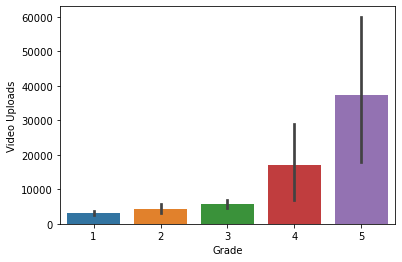

In [31]:
sns.barplot(x='Grade',y='Video Uploads',data=data)

<AxesSubplot:xlabel='Grade', ylabel='Video Uploads'>

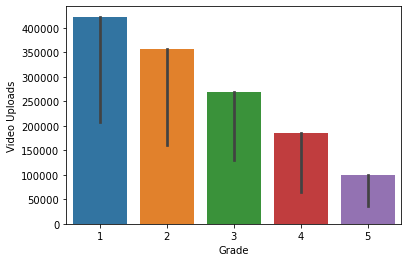

In [32]:
# estimator تسمح بطبيق دالة محدد على البيانات
# mean هي الدالة الأفتراضية 
sns.barplot(x='Grade',y='Video Uploads',data=data,estimator=np.max)

<AxesSubplot:xlabel='Grade', ylabel='Avr_views'>

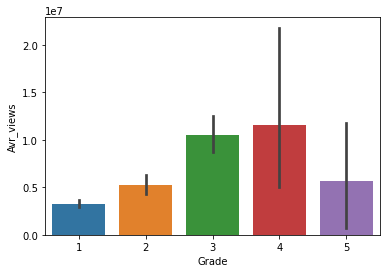

In [33]:
sns.barplot(x='Grade',y='Avr_views',data=data)

<AxesSubplot:xlabel='Grade', ylabel='Avr_views'>

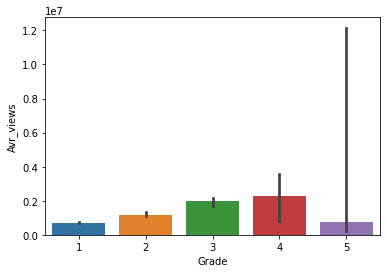

In [34]:
sns.barplot(x='Grade',y='Avr_views',data=data,estimator=np.median)

<AxesSubplot:xlabel='Grade', ylabel='Subscribers'>

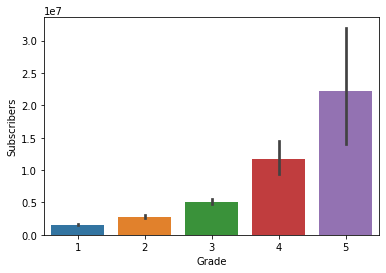

In [35]:
sns.barplot(x='Grade',y='Subscribers',data=data)

<AxesSubplot:xlabel='Grade', ylabel='Subscribers'>

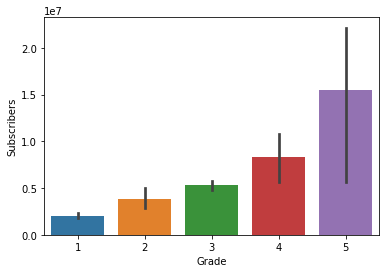

In [36]:
sns.barplot(x='Grade',y='Subscribers',data=data,estimator=np.std)

<h2> groupby  </h2>
<br>
 <b>
 أن العامود المختار لديه عناصر متكررة متواجدة في سطور مختلفة مرتبطة مع كامل السطر        
 وكل عنصر متكرر يكون مفتاح لبقية البيانات المرتبطة به المتواجدة في السطر ذاته
 تضع هذه الدالة البيانات ضمن مجموعات متصلة بكل مفتاح لننفذ عليها عمليات محدد كالمتوسط 
وطبعا كل عامود يتمتع بصفات معينة لذلك نستطيع تحديد العامود المطلوب لتنفيذ العملية عليه
   

In [37]:
data.groupby('Grade')['Avr_views'].median().sort_values(ascending = False).head()

Grade
4   2262761.95
3   1959092.75
2   1178439.66
5    772367.33
1    711615.77
Name: Avr_views, dtype: float64

In [38]:
data.groupby('Grade')['Video views'].median().sort_values(ascending=False).head()

Grade
5   21772867442.00
4    6170353758.50
3    1584777454.00
2     694660092.00
1     369892284.50
Name: Video views, dtype: float64